In [12]:
%matplotlib inline

In [13]:
import pandas as pd
import numpy as np 
import re  
import json
import random
from scipy.stats import logistic
import seaborn as sns
import matplotlib.pyplot as plt 
import calendar

In [17]:
df_path = 'youtube.csv'
df = pd.read_csv(df_path)
df_youtube = df
df.head()

,Unnamed: 0,videoId,publishedAt,channelId,title,description,channelTitle,liveBroadcastContent,publishTime,viewCount,likeCount,dislikeCount,favoriteCount,commentCount
0,0,wwf09xtoQHU,2020-05-22 16:50:47+00:00,UCev-b-xy-p5fHK8x3zJyn1Q,"Quarantine - Wasafi Feat Diamond Platnumz, Ray...",Do You Think Your Quarantine Moves Are Better ...,Diamond Platnumz,none,2020-05-22 16:50:47+00:00,13184875,135054,12082,0,14388.0
1,1,Vz4HjqJwebA,2020-04-28 12:35:52+00:00,UCCgLoMYIyP0U56dEhEL1wXQ,Get SNATCHED during Quarantine | Before After ...,Here are some before after transformation jour...,Chloe Ting,none,2020-04-28 12:35:52+00:00,5551715,201886,1291,0,8224.0
2,2,msxjmQowTIA,2020-06-24 02:21:36+00:00,UCGMHLRrGvKWWdk6EAZOqVfQ,Bug&#39;s Quarantine Tiktok Duets,My favorite people in tiktok :),Little Big Toys,none,2020-06-24 02:21:36+00:00,4364616,42109,5822,0,NaN
3,3,YwVT1ao8FzM,2020-04-28 17:56:27+00:00,UCCryrohClZM8XK4yEYBE_qA,Hello Neighbor Steals Our Quarantine Games!!! ...,Hello Neighbor in Real Life Steals Our Play at...,Trinity and Beyond,none,2020-04-28 17:56:27+00:00,3967220,41454,3756,0,NaN
4,4,nW5bmRfwLHE,2020-03-25 16:49:43+00:00,UCb934vQ6fg1JZQKvkCQ_j-Q,Snow Tha Product - NoWhere To Go (QUARANTINE L...,Since everyone is quarantined in the house bec...,SNOWTHAPRODUCT,none,2020-03-25 16:49:43+00:00,2711806,82223,1635,0,10728.0


Pie Chart what percentage of trending videos have comments disabled 

0 means comments are abled, but with no comment. NaN's are disabled 

In [4]:
comments = df['commentCount'].value_counts()
comments_disabled = df['commentCount'].isna().value_counts()

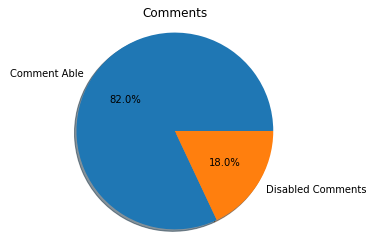

In [5]:
plt.pie(df['commentCount'].isna().value_counts(),labels=['Comment Able', 'Disabled Comments'], autopct='%1.1f%%', shadow=True)
plt.title('Comments')
plt.axis('equal')
plt.show()
plt.style.use('ggplot')


In [15]:
df

,Unnamed: 0,videoId,publishedAt,channelId,title,description,channelTitle,liveBroadcastContent,publishTime,viewCount,likeCount,dislikeCount,favoriteCount,commentCount
0,0,wwf09xtoQHU,2020-05-22 16:50:47+00:00,UCev-b-xy-p5fHK8x3zJyn1Q,"Quarantine - Wasafi Feat Diamond Platnumz, Ray...",Do You Think Your Quarantine Moves Are Better ...,Diamond Platnumz,none,2020-05-22 16:50:47+00:00,13184875,135054,12082,0,14388.0
1,1,Vz4HjqJwebA,2020-04-28 12:35:52+00:00,UCCgLoMYIyP0U56dEhEL1wXQ,Get SNATCHED during Quarantine | Before After ...,Here are some before after transformation jour...,Chloe Ting,none,2020-04-28 12:35:52+00:00,5551715,201886,1291,0,8224.0
2,2,msxjmQowTIA,2020-06-24 02:21:36+00:00,UCGMHLRrGvKWWdk6EAZOqVfQ,Bug&#39;s Quarantine Tiktok Duets,My favorite people in tiktok :),Little Big Toys,none,2020-06-24 02:21:36+00:00,4364616,42109,5822,0,NaN
3,3,YwVT1ao8FzM,2020-04-28 17:56:27+00:00,UCCryrohClZM8XK4yEYBE_qA,Hello Neighbor Steals Our Quarantine Games!!! ...,Hello Neighbor in Real Life Steals Our Play at...,Trinity and Beyond,none,2020-04-28 17:56:27+00:00,3967220,41454,3756,0,NaN
4,4,nW5bmRfwLHE,2020-03-25 16:49:43+00:00,UCb934vQ6fg1JZQKvkCQ_j-Q,Snow Tha Product - NoWhere To Go (QUARANTINE L...,Since everyone is quarantined in the house bec...,SNOWTHAPRODUCT,none,2020-03-25 16:49:43+00:00,2711806,82223,1635,0,10728.0
5,5,HZzFthHzoQc,2020-04-16 00:25:01+00:00,UCote1q4BlW0K0xJW9ejOW8Q,30 Days HOME QUARANTINE push-ups challenge epi...,"Hi there, im Renz lesaca Because of the corona...",Renz Lesaca,none,2020-04-16 00:25:01+00:00,2661686,33747,1634,0,1370.0
6,6,9F8XSR7y5P0,2020-04-04 12:15:00+00:00,UCtZAaljDNIsIAIhwYYzvEiw,FORTNITE DANCE CHALLENGE IN REAL LIFE!! - Quar...,Bringing back the Fortnite Dance Challenge to ...,The Bee Family,none,2020-04-04 12:15:00+00:00,2428581,51988,5269,0,3187.0
7,7,f9p0ZL-5Ia0,2020-03-21 18:45:11+00:00,UC4maAeg5p7VReekWh4fTVcA,LAST TO Leave The Self Quarantine WINS w/ My C...,"Hey guys its Walker Bryant, also known as Pipe...",Walker Bryant,none,2020-03-21 18:45:11+00:00,2269326,51488,1557,0,NaN
8,8,5I7GLP6_rbo,2020-04-11 14:55:57+00:00,UCZT_OWY9abyO3V9Rmdvh02w,Jannat Zubair and Ayaan Zubair FUNNIEST and CU...,WATCH Jannat Zubair and Ayaan Zubair FUNNIEST ...,Viralbollywood,none,2020-04-11 14:55:57+00:00,2225918,27751,1889,0,404.0
9,9,zGx_r6RoOkc,2020-03-25 20:05:08+00:00,UC5_IT4-XpinnvNQwM1e15eQ,194 RATED FUT DRAFT QUARANTINE CHALLENGE - FIF...,W2S 194 RATED FUT DRAFT CHALLENGE My Instagram...,W2SPlays,none,2020-03-25 20:05:08+00:00,2122903,62002,2377,0,2452.0


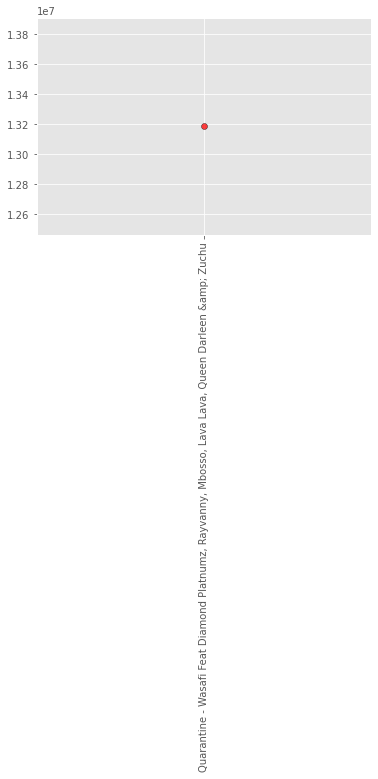

In [25]:
#input_date = input(f'Enter a date to see what was trending that day example year-day-month')
#date=df[df['publishedAt']==input_date]
df=df_youtube
df=df[df['videoId']=='wwf09xtoQHU']
xax = df['title']
yax = df['viewCount']
plt.style.use('ggplot')
plt.scatter(xax, yax, marker="o", facecolors="red", edgecolors="black", alpha=0.75)
plt.xticks(xax, rotation="vertical")
#plt.bar(xax, yax)
plt.show()